In [2]:
# Importasi library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pycountry
import pycountry_convert as pc

# Business & Data Understanding

### Latar Belakang Masalah
Sektor pariwisata kian mengalami perkembangan yang pesat seiring dengan majunya globalisasi dan terbangunnya jaringan infrastruktur seperti internet yang menjangkau seluruh kalangan masyarakat di seluruh belahan dunia. Penyebaran informasi melalui internet yang menjadi ciri khas dari era globalisasi juga turut mendukung segala usaha sosialisasi dan word-of-mouth-marketing mengenai tempat-tempat wisata serta pengalaman-pengalaman turis yang menarik, sedemikian rupa sehingga membawa masyarakat global untuk semakin tertarik melakukan travelling.

(masukkin gambar pariwisata di sini)

Akan tetapi, dibalik semua peluang menjanjikan yang ada, terdapat masalah yang cukup signifikan dalam industri perhotelan, yaitu "pembatalan mendadak". Bahkan, data historis menunjukkan bahwa terdapat sekitar 16,4 cancellations per hari per satu hotel pada rentang waktu Januari hingga Juli tahun 2016 (Freed, 2016). Permasalahan tersebut sangatlah signifikan dan penting mengingat bahwa angka ini diekspektasi untuk terus bertambah dengan semakin maraknya budaya cancel and re-book reservasi hotel. Singkatnya, konsumen tidak ingin menghabiskan lebih banyak uang apabila mereka memiliki kesempatan untuk mengurangi pengeluaran mereka.

Keadaan pandemi seperti yang sedang terjadi ketika tulisan ini dibuat (awal tahun 2021), bukanlah suatu alasan untuk tidak memperhatikan lebih lanjut mengenai tingkat pembatalan pesanan hotel. Justru sebaliknya, hotel dan penyedia layanan jasa hospitality sejenis harus semakin waspada menghadapi growth rebound yang akan terjadi mulai pada tahun 2022 hingga 2023. Apabila perusahaan tidak dapat memprediksikan kemungkinan pembatalan hotel dengan baik, maka besar kemungkinan terjadi penyempitan revenue dan pembengkakan oportunity cost.

### Asal Data
#### Dataset Hotel Booking Demand
Data ini merupakan dataset Hotel Booking Demand yang diambil dari situs Kaggle. Kaggle merupakan platform penyedia layanan berbagi datasets, eksplorasi, dan pemodelan. Berikut merupakan tautan dari laman Kaggle yang membagikan informasi mengenai dataset Hotel Booking Demand (https://www.kaggle.com/jessemostipak/hotel-booking-demand).

(masukin logo kaggle di sini)

Data yang tersedia pada situs Kaggle tersebut merupakan data yang cukup kredibel karena diambil dari salah satu artikel bernama "Hotel Booking Demand Dataset" pada halaman 41-49 jurnal bernama "Data In Brief" Volume 22 yang terbit pada Februari 2019 kemarin. Berikut merupakan tautan dari jurnal yang digunakan sebagai referensi dataset yang akan dianalisis secara lebih lanjut (https://www.sciencedirect.com/science/article/pii/S2352340918315191).

**Dataset** yang digunakan merupakan data yang diambil pada **2 (dua) hotel** berbeda yaitu H1 (Resort Hotel) dan H2 (City Hotel). Terdapat **40060 row data** pengamatan yang diambil dari **H1** dan **79330 row data** pengamatan yang diambil dari **H2** pada rentang waktu 1 Juli 2015 s/d 31 Agustus 2017. Secara total, dataset yang digunakan mengandung 31 (tiga puluh satu) kolom feature dengan 1 (satu) target akhir berupa kolom "is_canceled" yang menandakan apakah konsumen terkait melakukan pembatalan pesanan hotel atau tidak. Perihal detail dari masing-masing feature yang terdapat pada dataset terkait akan dipaparkan pada tabel di bawah ini:

(masukin tabel kolom di sini)

In [3]:
data = pd.read_csv("hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Data Exploration & Visualization

## 1. Informasi umum & Missing value

In [3]:
data.shape

(119390, 32)

In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [6]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

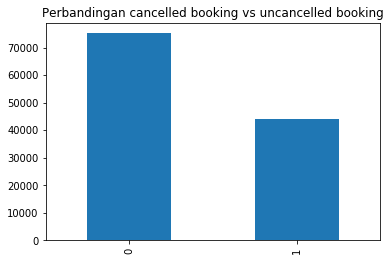

In [8]:
data['is_canceled'].value_counts().plot(kind='bar', title="Perbandingan cancelled booking vs uncancelled booking")

### Hasil observasi:
1. Didapatkan bahwa terdapat beberapa missing value, khususnya pada kolom children, country, agent, dan company. Missing value pada feature company dan agent berukuran sangat besar, pertimbangkan untuk drop 2 feature tersebut.
2. Nilai rata-rata kolom target 'is_canceled' tidak rata di angka 0,5. Menandakan bahwa komposisi data booking yang berujung pada 'is_canceled' = True dan 'is_canceled' = False tidaklah rata. Perlu dipertimbangkan untuk menggunakan parameter penilaian khusus seperti **F1 Score** supaya hasil output menjadi lebih kredibel.
3. Tipe data untuk feature 'resevation_status_date', 'arrival_date_month' masih dalam bentuk object / string. Kemungkinan perlu dilakukan pengubahan tipedata lebih lanjut untuk mempermudah proses pengolahan.
4. Masih banyak beberapa fitur lain yang masih dalam bentuk object, nantinya perlu dilakukan encoding sebelum masuk ke tahap modelling.
5. Data sedikit kurang balance, lebih banyak kasus cancelation booking daripada booking yang sukses

#### Conclusion:
1. Periksa kembali feature 'agent' & 'company'
2. Perbaiki missing value 'children' & 'country' atau hapus row data bersangkutan
3. Gunakan parameter penilaian F1 Score
4. Ubah data-type 'reservation_status_date' & 'arrival_date_month' ke dalam bentuk datetime apabila dibutuhkan & memungkinkan
5. Lakukan encoding untuk beberapa fitur dengan data-type object/string

## 2. Pengaruh Jenis Hotel

In [9]:
data[['hotel','is_canceled']].groupby('hotel').mean()

,is_canceled
hotel,
City Hotel,0.417270
Resort Hotel,0.277634


### Hasil observasi:
1. Secara garis besar, kedua jenis hotel ternyata memiliki tingkat pembatalan pesanan yang berbeda
2. City Hotel memiliki peluang pembatalan yang lebih tinggi daripada Resort Hotel

## 3. Pengaruh Lead Time

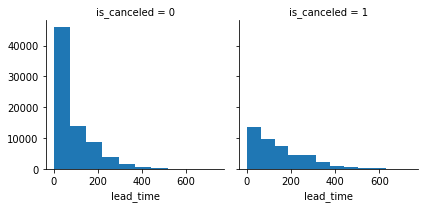

In [10]:
g = sns.FacetGrid(data, col='is_canceled')
g.map(plt.hist, "lead_time")

### Hasil observasi:
1. Semakin tinggi 'lead_time', semakin tinggi pula peluang order tersebut dicancel
2. Banyak customer yang melakukan reservasi di bawah 70 hari.
3. Pada rentang waktu 'lead_time' sekitar di bawah 70 hari, peluang tidak cancel jauh lebih besar daripada peluang cancel.

#### Conclusion:
1. Manajemen dapat menentukan limitasi maksimal tanggal H-x pemesanan (?)

## 4. Pengaruh Tanggal Pemesanan

In [11]:
data[['arrival_date_year','is_canceled']].groupby('arrival_date_year').mean()

,is_canceled
arrival_date_year,
2015,0.370158
2016,0.358633
2017,0.386979


In [12]:
data[['arrival_date_month','is_canceled']].groupby('arrival_date_month').mean()

,is_canceled
arrival_date_month,
April,0.407972
August,0.377531
December,0.349705
February,0.334160
January,0.304773
July,0.374536
June,0.414572
March,0.321523
May,0.396658


<BarContainer object of 31 artists>

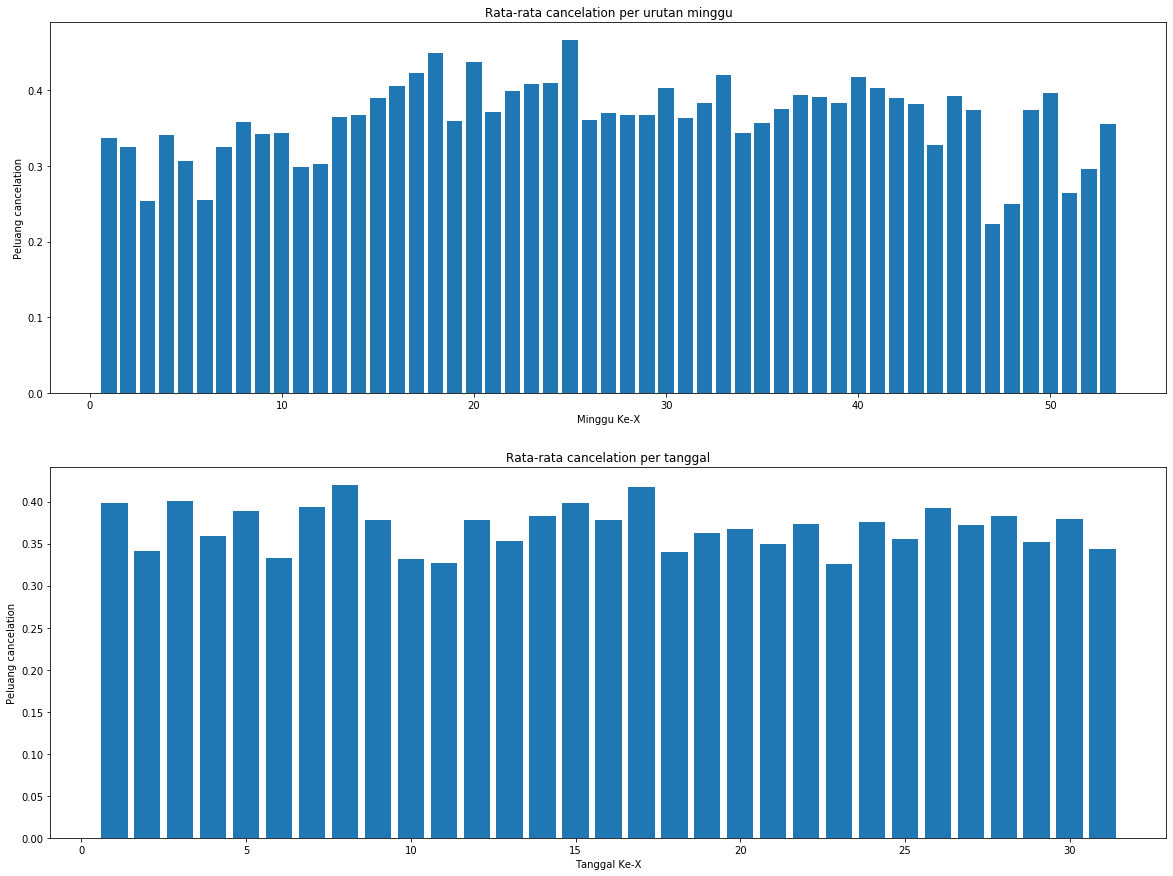

In [13]:
data_mingguan = data.groupby('arrival_date_week_number')['is_canceled'].mean()
data_bulanan = data.groupby('arrival_date_day_of_month')['is_canceled'].mean()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax1.set_title("Rata-rata cancelation per urutan minggu")
ax1.set_xlabel("Minggu Ke-X")
ax1.set_ylabel("Peluang cancelation")
ax1.bar(data_mingguan.index, data_mingguan)

ax2.set_title("Rata-rata cancelation per tanggal")
ax2.set_xlabel("Tanggal Ke-X")
ax2.set_ylabel("Peluang cancelation")
ax2.bar(data_bulanan.index, data_bulanan)




### Hasil Observasi:
1. Tidak ada perbedaan cancelation rate yang cukup signifikan untuk tanggal reservasi & tahun
2. Terdapat perbedaan cukup signifikan pada urutan minggu & bulan. Akan tetapi data mingguan merupakan feature turunan dari bulan, dapat dipertimbangkan untuk memilih salah satu feature saja dalam rangka mencegah overfitting & mengurangi redundansi data.

#### Conclusion:
1. Drop 'arrival_date_day_of_month', 'arrival_date_year', dan 'arrival_date_month'
2. Pertahankan 'arrival_date_week_number'

## 5. Pengaruh Durasi Booking

<BarContainer object of 35 artists>

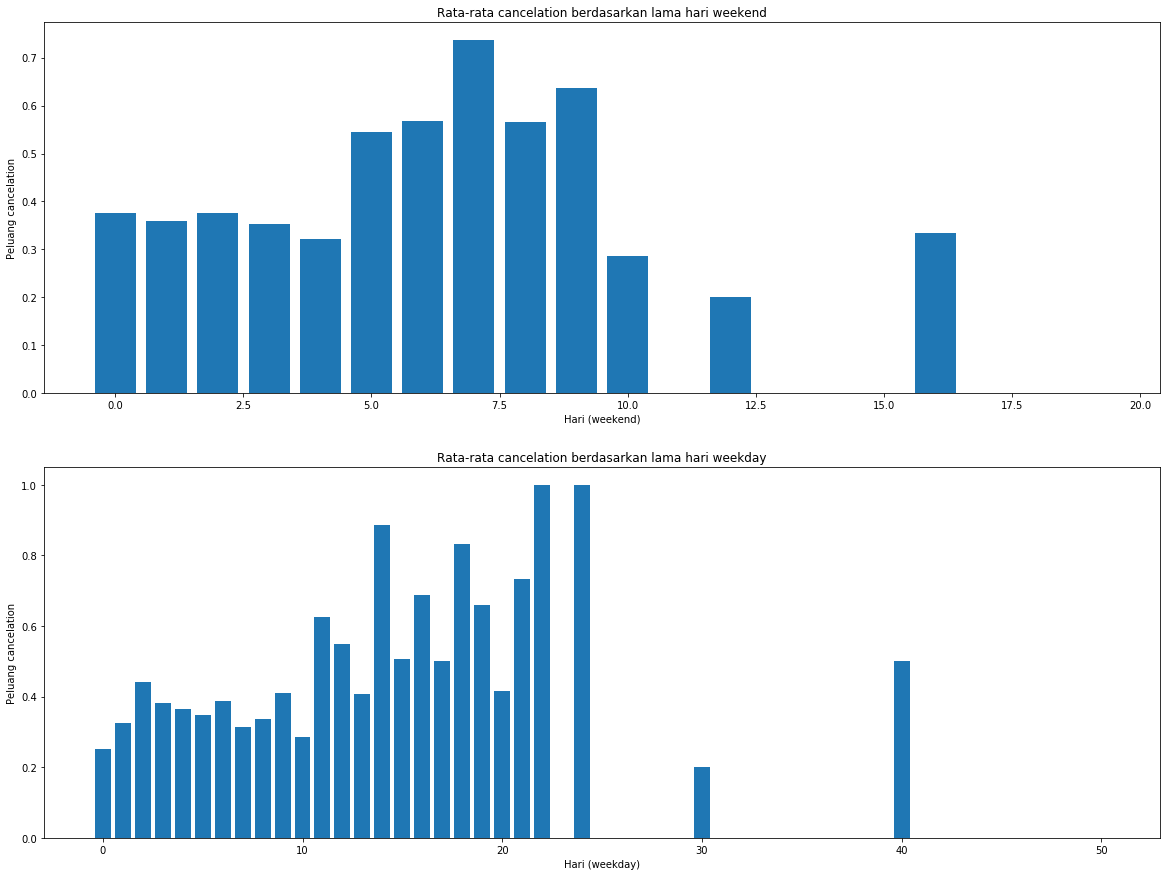

In [14]:
data_weekend = data.groupby('stays_in_weekend_nights')['is_canceled'].mean()
data_weekday = data.groupby('stays_in_week_nights')['is_canceled'].mean()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax1.set_title("Rata-rata cancelation berdasarkan lama hari weekend")
ax1.set_xlabel("Hari (weekend)")
ax1.set_ylabel("Peluang cancelation")
ax1.bar(data_weekend.index, data_weekend)

ax2.set_title("Rata-rata cancelation berdasarkan lama hari weekday")
ax2.set_xlabel("Hari (weekday)")
ax2.set_ylabel("Peluang cancelation")
ax2.bar(data_weekday.index, data_weekday)

In [15]:
(data['stays_in_weekend_nights'] + data['stays_in_week_nights']).value_counts()

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
28       35
18       35
19       22
17       20
22       14
29       14
20       14
30       13
23        8
26        6
24        6
27        5
35        5
42        4
33        3
56        2
57        1
34        1
38        1
43        1
69        1
45        1
46        1
48        1
49        1
60        1
dtype: int64

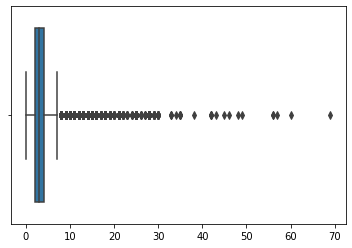

In [16]:
sns.boxplot(data['stays_in_weekend_nights'] + data['stays_in_week_nights'])

<BarContainer object of 45 artists>

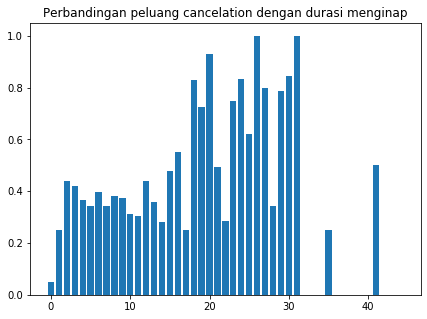

In [17]:
data_stay = pd.DataFrame(columns = ['is_canceled'])
data_stay['is_canceled'] = data['is_canceled']
data_stay['durasi_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
x = data_stay[['is_canceled','durasi_stay']].groupby('durasi_stay', as_index=False).mean()

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.set_title("Perbandingan peluang cancelation dengan durasi menginap")
ax.bar(x.index, x['is_canceled'])

### Hasil Observasi:
1. Ketika jumlah hari menginap sedikit (sekitar <5 weekend & <=10 weekday), peluang cancelation lebih sedikit
2. Ketika jumlah hari menginap banyak, peluang cancelation lebih besar
3. Mayoritas menginap di rentang durasi 1-4 hari
4. Ketika digabung, pola yang dihasilkan juga mirip (pada rentang <=15 peluang cancelation lebih rendah)

#### Conclusion:
1. Pola kedua feature cukup mirip, bisa dicoba untuk mengkombinasikan kedua fitur guna menurunkan kompleksitas model

## 6. Pengaruh Jumlah Orang yang dibooking

(0, 1)

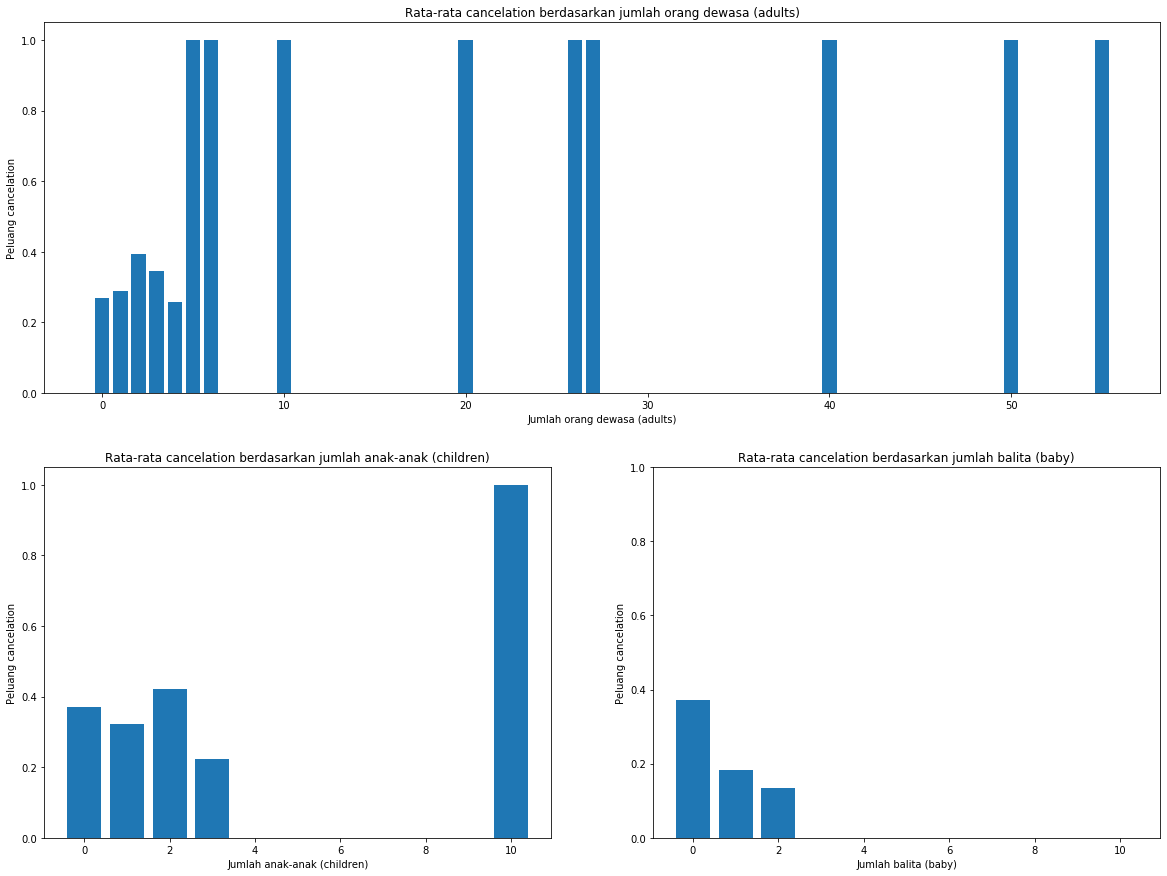

In [18]:
data_adults = data.groupby('adults')['is_canceled'].mean()
data_children = data.groupby('children')['is_canceled'].mean()
data_babies = data.groupby('babies')['is_canceled'].mean()

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax1.set_title("Rata-rata cancelation berdasarkan jumlah orang dewasa (adults)")
ax1.set_xlabel("Jumlah orang dewasa (adults)")
ax1.set_ylabel("Peluang cancelation")
ax1.bar(data_adults.index, data_adults)

ax2.set_title("Rata-rata cancelation berdasarkan jumlah anak-anak (children)")
ax2.set_xlabel("Jumlah anak-anak (children)")
ax2.set_ylabel("Peluang cancelation")
ax2.bar(data_children.index, data_children)

ax3.set_title("Rata-rata cancelation berdasarkan jumlah balita (baby)")
ax3.set_xlabel("Jumlah balita (baby)")
ax3.set_ylabel("Peluang cancelation")
ax3.bar(data_babies.index, data_babies)
ax3.set_ylim([0,1])

In [19]:
data['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64

In [20]:
data.loc[data['adults'] > 4]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1539,Resort Hotel,1,304,2015,September,36,3,0,3,40,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1587,Resort Hotel,1,333,2015,September,36,5,2,5,26,...,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1643,Resort Hotel,1,336,2015,September,37,7,1,2,50,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-18
1752,Resort Hotel,1,340,2015,September,37,12,2,5,26,...,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1884,Resort Hotel,1,347,2015,September,38,19,2,5,26,...,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1917,Resort Hotel,1,349,2015,September,39,21,1,3,27,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
1962,Resort Hotel,1,352,2015,September,39,24,1,3,27,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2003,Resort Hotel,1,354,2015,September,39,26,2,5,26,...,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2164,Resort Hotel,1,361,2015,October,40,3,2,5,26,...,No Deposit,96.0,NaN,0,Group,0.0,0,0,Canceled,2015-01-02
2173,Resort Hotel,1,338,2015,October,41,4,2,0,55,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,Canceled,2015-01-02


In [21]:
data['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

In [22]:
data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [23]:
data_jumlah_children_baby=(data['children']+data['babies']).loc[(data['children']+data['babies'])>0].count()
print("jumlah order dengan setidaknya 1 children atau baby: ", data_jumlah_children_baby)
print("persentase order dengan setidaknya 1 children atau baby: ", round(100*data_jumlah_children_baby/data.shape[0],3), "%")

jumlah order dengan setidaknya 1 children atau baby:  9332
persentase order dengan setidaknya 1 children atau baby:  7.816 %


### Hasil Observasi:
1. Secara umum, semakin banyak orang dewasa = semakin besar peluang cancel; Sebaliknya, semakin banyak anak-anak = semakin kecil peluang cancel. Kasus ekstrim, pada data, ketika jumlah orang dewasa >=4, selalu berujung dengan cancelation.
2. Hanya sebagian kecil (kurang dari 10 ribu; <10%) pemesanan yang melibatkan anak-anak dan balita.

#### Conclusion:
1. Bisa lebih memberlakukan sistem DP untuk jumlah orang dewasa >=5?
2. Menggabungkan feature children dan baby karena jumlah booking yang mengandung keduanya relatif sedikit & keduanya memiliki pola yang sama

## 7. Pengaruh Pemesanan Paket Makan

In [24]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [25]:
data_meal = data.groupby(['meal'], as_index=False)['meal','is_canceled'].mean()
data_meal

,meal,is_canceled
0,BB,0.373849
1,FB,0.598997
2,HB,0.344603
3,SC,0.372394
4,Undefined,0.244654


### Hasil Observasi:
1. Booking yang memesan menu untuk FB (Full board - Breakfast, Lunch, & Dinner) cenderung memiliki peluang pembatalan order yang lebih besar daripada menu lainnya.
2. Booking yang Undefined (tidak memesan menu makanan) cenderung memiliki peluang pembatalan order yang rendah daripada menu lainnya.

## 8. Pengaruh Asal Lokasi Negara Pemesan

In [26]:
data['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
AIA        1
SDN        1
CYM        1
SLE        1
UMI        1
Name: country, Length: 177, dtype: int64

In [27]:
x = data.groupby(['country'])['country'].count()
x[x>1000].sort_values()

country
SWE     1024
AUT     1263
CN      1279
CHE     1730
USA     2097
NLD     2104
BRA     2224
BEL     2342
IRL     3375
ITA     3766
DEU     7287
ESP     8568
FRA    10415
GBR    12129
PRT    48590
Name: country, dtype: int64

In [28]:
data_country = data[data['country'].map(data.groupby(['country'])['country'].count()>1000).fillna(False)]
data_country[['country', 'is_canceled']].groupby(['country'], as_index = False).mean()

,country,is_canceled
0,AUT,0.182106
1,BEL,0.202391
2,BRA,0.373201
3,CHE,0.247399
4,CN,0.198593
5,DEU,0.167147
6,ESP,0.254085
7,FRA,0.185694
8,GBR,0.202243
9,IRL,0.246519


In [29]:
data_country = data[data['country'].map((data.groupby(['country'])['country'].count()>100) & (data.groupby(['country'])['country'].count()<=1000)).fillna(False)]
data_country[['country', 'is_canceled']].groupby(['country'], as_index = False).mean()

,country,is_canceled
0,AGO,0.566298
1,ARG,0.252336
2,AUS,0.251174
3,CHN,0.462462
4,CZE,0.216374
5,DNK,0.250575
6,DZA,0.203883
7,FIN,0.154362
8,GRC,0.273438
9,HUN,0.334783


In [30]:
# #tambahin data GDP?
# import requests
# import pandas as pd
# from bs4 import BeautifulSoup as bs

# #scrapping
# r = requests.get("https://countrycode.org/")
# soup = bs(r.content, features = "html.parser")

# tab = soup.find("table", attrs={"class":"table table-hover table-striped main-table"})
# table_head = ["COUNTRY", "COUNTRY CODE", "ISO CODE", "POPULATION", "AREA", "GDP"]
# table_rows = tab.tbody.find_all("tr")

# df=[]
# for row in table_rows:
#     td = row.find_all("td")
#     row = [tr.get_text() for tr in td]
#     df.append(row)
# data = pd.DataFrame(df, columns = table_head)

# def country_to_iso(country):
#     return (data[data["COUNTRY"] == country.title()]["ISO CODE"].iloc[0][:2].lower())

# def iso_to_country(iso):
#     if len(iso) == 3:
#         return (data[data["ISO CODE"].str.contains(iso.upper())]["COUNTRY"].iloc[0])
#     elif len(iso) == 2:
#         return (data[data["ISO CODE"].str.startswith(iso.upper())]["COUNTRY"].iloc[0])

In [31]:
def convert_benua(x):
    if x == "TMP": # khusus timor leste, karena ganti nama iso code
        return "AS"
    if len(x) == 3:
        x=pc.country_alpha3_to_country_alpha2(x)
    #khusus untuk negara tanpa benua:
    if x in ['AQ', 'UM', 'TF']:
        return "Null"
    return pc.country_alpha2_to_continent_code(x)

#### Fun fact:
Timor leste resmi merubah nama ISO code mereka dari 'TMP' ke 'TLS/TL' pada tahun 2002
https://www.iso.org/files/live/sites/isoorg/files/archive/pdf/en/newsletter_v-5_east_timor.pdf

Tapi pada dataset, masih tertulis TMP

In [32]:
data.loc[data['country']!='PRT', ['is_canceled','country']]

,is_canceled,country
2,0,GBR
3,0,GBR
4,0,GBR
5,0,GBR
12,0,USA
...,...,...
119385,0,BEL
119386,0,FRA
119387,0,DEU
119388,0,GBR


In [33]:
data_benua = data.loc[data['country']!='PRT', ['is_canceled','country']].dropna()
data_benua['benua'] = data_benua['country'].apply(convert_benua)
data_benua

,is_canceled,country,benua
2,0,GBR,EU
3,0,GBR,EU
4,0,GBR,EU
5,0,GBR,EU
12,0,USA,NA
...,...,...,...
119385,0,BEL,EU
119386,0,FRA,EU
119387,0,DEU,EU
119388,0,GBR,EU


In [34]:
data_benua['benua'].value_counts()

EU      59236
AS       4471
SA       2708
NA       2274
AF       1113
OC        506
Null        4
Name: benua, dtype: int64

In [35]:
data_per_benua = data_benua[['benua', 'is_canceled']].groupby('benua', as_index=False).mean()
data_per_benua

,benua,is_canceled
0,AF,0.430368
1,AS,0.327891
2,EU,0.221031
3,NA,0.231750
4,Null,0.250000
5,OC,0.225296
6,SA,0.353767


<BarContainer object of 7 artists>

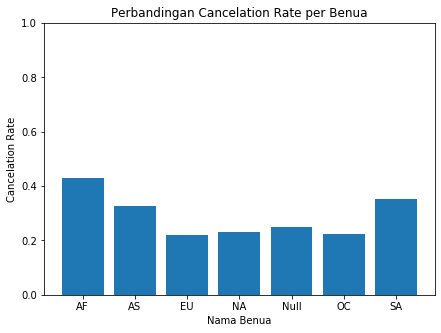

In [36]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.set_title("Perbandingan Cancelation Rate per Benua")
ax.set_ylim([0,1])
ax.set_ylabel("Cancelation Rate")
ax.set_xlabel("Nama Benua")
ax.bar(data_per_benua['benua'], data_per_benua['is_canceled'])

### Hasil Observasi
1. Pemesan secara garis besar terpusat pada PRT > GBR > FRA > ESP > DEU (Portugal, United Kingdom, France, Spain, Germany).   <ul><li>Portugal = Tempat pengambilan data / lokasi hotel;</li><li>UK & Germany = Dekat dengan Portugal & GDP relatif tinggi;</li><li>France & Spain = Dekat dengan Portugal</li></ul>
2. Dari seluruh negara yang memiliki pemesanan lebih dari 1000, PRT memiliki tingkat pembatalan yang paling tinggi. Indikasi pemesanan dalam negeri memiliki peluang pembatalan yang lebih tinggi
3. Secara umum, negara asal mempengaruhi tinggal pembatalan order. Terlihat dari besar peluang pembatalan yang bervariasi antar negara.
4. Ketika diklasifikasikan menurut benua asal, ditemukan bahwa AF (Africa) memiliki tingkat Cancelation yang lebih besar daripada benua lainnya, dilanjut dengan SA (South America) dan AS (Asia). Diduga hal ini dipengaruhi oleh budaya pemesanan dari masing-masing kontinen terkait.

#### Conclusion:
1. Dapat dipertimbangkan untuk mengklasifikasikan negara berdasarkan benuanya guna menurunkan kompleksitas model, tapi tetap membiarkan menyediakan 1 fitur khusus untuk negara "Portugal" selaku indikator pemesanan dalam negeri yang mana memiliki peluang cancel yang relatif tinggi

## 9. Pengaruh Market Segment & Distribution Channel

In [37]:
data.groupby(['market_segment', 'distribution_channel'])['is_canceled'].mean()

market_segment  distribution_channel
Aviation        Corporate               0.224670
                TA/TO                   0.100000
Complementary   Corporate               0.224719
                Direct                  0.121528
                TA/TO                   0.089744
Corporate       Corporate               0.183375
                Direct                  0.110465
                TA/TO                   0.283582
Direct          Corporate               0.111111
                Direct                  0.155833
                GDS                     0.000000
                TA/TO                   0.042194
                Undefined               0.500000
Groups          Corporate               0.324104
                Direct                  0.368886
                TA/TO                   0.651978
Offline TA/TO   Corporate               0.485849
                Direct                  0.187500
                GDS                     0.177778
                TA/TO           

In [38]:
data_market_mean = data.groupby(['market_segment'], as_index=False)['is_canceled'].mean()
data_market_mean

,market_segment,is_canceled
0,Aviation,0.219409
1,Complementary,0.130552
2,Corporate,0.187347
3,Direct,0.153419
4,Groups,0.610620
5,Offline TA/TO,0.343160
6,Online TA,0.367211
7,Undefined,1.000000


In [39]:
data_market_count = data.groupby(['market_segment'], as_index=False)['is_canceled'].count()
data_market_count

,market_segment,is_canceled
0,Aviation,237
1,Complementary,743
2,Corporate,5295
3,Direct,12606
4,Groups,19811
5,Offline TA/TO,24219
6,Online TA,56477
7,Undefined,2


In [40]:
data_distribution_mean = data.groupby(['distribution_channel'], as_index=False)['is_canceled'].mean()
data_distribution_mean

,distribution_channel,is_canceled
0,Corporate,0.220758
1,Direct,0.174599
2,GDS,0.191710
3,TA/TO,0.410259
4,Undefined,0.800000


In [41]:
data_distribution_count = data.groupby(['distribution_channel'], as_index=False)['is_canceled'].count()
data_distribution_count

,distribution_channel,is_canceled
0,Corporate,6677
1,Direct,14645
2,GDS,193
3,TA/TO,97870
4,Undefined,5


<BarContainer object of 5 artists>

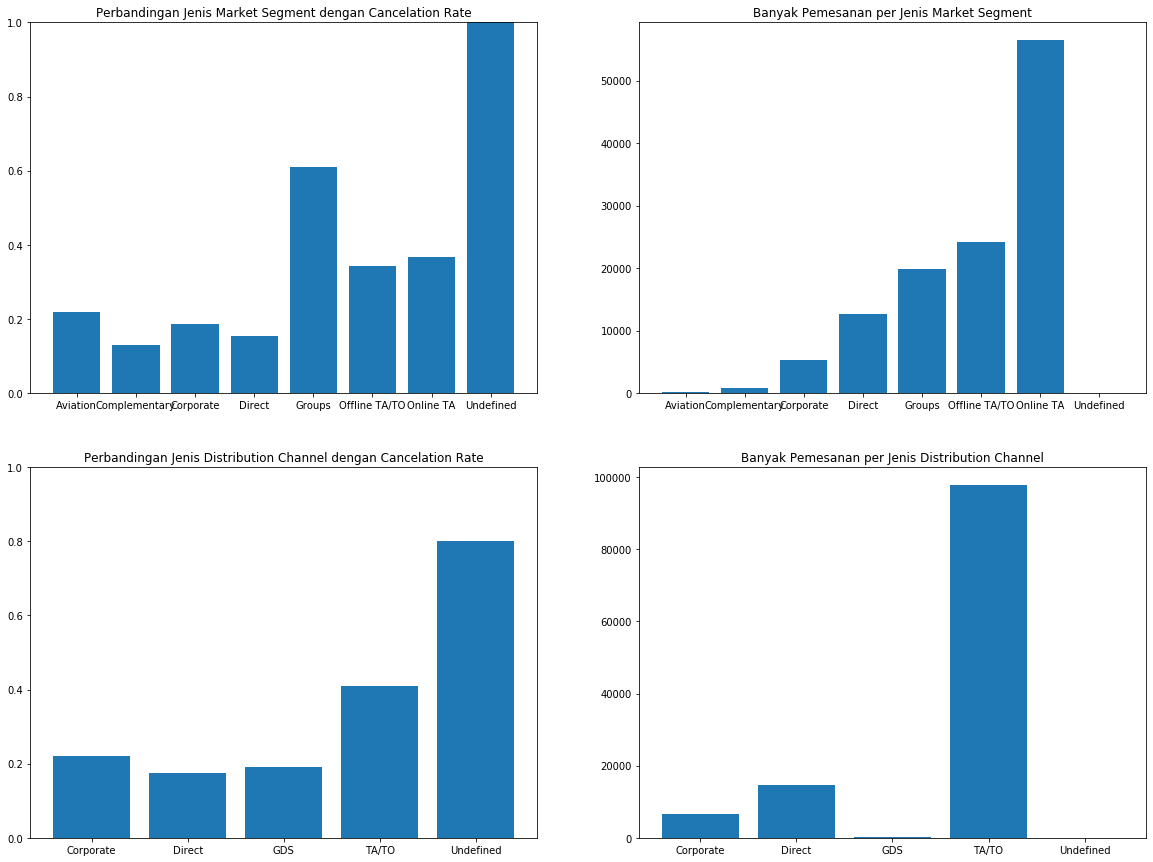

In [42]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title("Perbandingan Jenis Market Segment dengan Cancelation Rate")
ax2.set_title("Banyak Pemesanan per Jenis Market Segment")
ax3.set_title("Perbandingan Jenis Distribution Channel dengan Cancelation Rate")
ax4.set_title("Banyak Pemesanan per Jenis Distribution Channel")

ax1.set_ylim([0,1])
ax3.set_ylim([0,1])

ax1.bar(data_market_mean['market_segment'], data_market_mean['is_canceled'])
ax2.bar(data_market_count['market_segment'], data_market_count['is_canceled'])
ax3.bar(data_distribution_mean['distribution_channel'], data_distribution_mean['is_canceled'])
ax4.bar(data_distribution_count['distribution_channel'], data_distribution_count['is_canceled'])

### Hasil Observasi:
1. Pemesanan untuk market segment "Group" berpeluang sangat tinggi untuk cancel jika dibandingkan dengan market segment lainnya
2. Mayoritas pemesan memesan lewat TA / TO (Travel Agency / Tour Operators)
3. Orang yang memesan lewat TA/TO berpeluang sangat besar untuk cancel

#### Conclusion:
1. Market Segment dibagi menjadi:
<ul><li>MS_Groups</li><li>MS_TA/TO</li><li>MS_Lain</li></ul>
2. Distribution Channel dibagi menjadi:
<ul><li>DC_TA/TO</li><li>DC_Lain</li></ul>
3. Untuk kedua fitur, bisa pertimbangin buat memisah kolom underdefined karena tend to be canceled

## 10. Pengaruh Historis Booking Sebelumnya

In [43]:
data['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [44]:
data[['is_repeated_guest','is_canceled']].groupby('is_repeated_guest').mean()

,is_canceled
is_repeated_guest,
0,0.377851
1,0.144882


In [45]:
data['previous_cancellations'].value_counts().sort_index()

0     112906
1       6051
2        116
3         65
4         31
5         19
6         22
11        35
13        12
14        14
19        19
21         1
24        48
25        25
26        26
Name: previous_cancellations, dtype: int64

In [46]:
data['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
36         1
49         1
50         1
63         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

In [47]:
data[data['previous_bookings_not_canceled']<20]['previous_bookings_not_canceled'].value_counts()

0     115770
1       1542
2        580
3        333
4        229
5        181
6        115
7         88
8         70
9         60
10        53
11        43
12        37
13        30
14        28
15        21
16        20
17        16
18        14
19        13
Name: previous_bookings_not_canceled, dtype: int64

In [48]:
data_prev_not_cancel = data[['previous_bookings_not_canceled','is_canceled']].groupby('previous_bookings_not_canceled', as_index=False).mean()
data_prev_not_cancel

,previous_bookings_not_canceled,is_canceled
0,0,0.380271
1,1,0.051232
2,2,0.055172
3,3,0.051051
4,4,0.052402
...,...,...
68,68,0.000000
69,69,0.000000
70,70,0.000000
71,71,0.000000


In [49]:
data_prev_cancel = data[['previous_cancellations','is_canceled']].groupby('previous_cancellations', as_index=False).mean()
data_prev_cancel

,previous_cancellations,is_canceled
0,0,0.339061
1,1,0.944307
2,2,0.327586
3,3,0.307692
4,4,0.225806
5,5,0.105263
6,6,0.318182
7,11,0.285714
8,13,0.916667
9,14,1.000000


<BarContainer object of 73 artists>

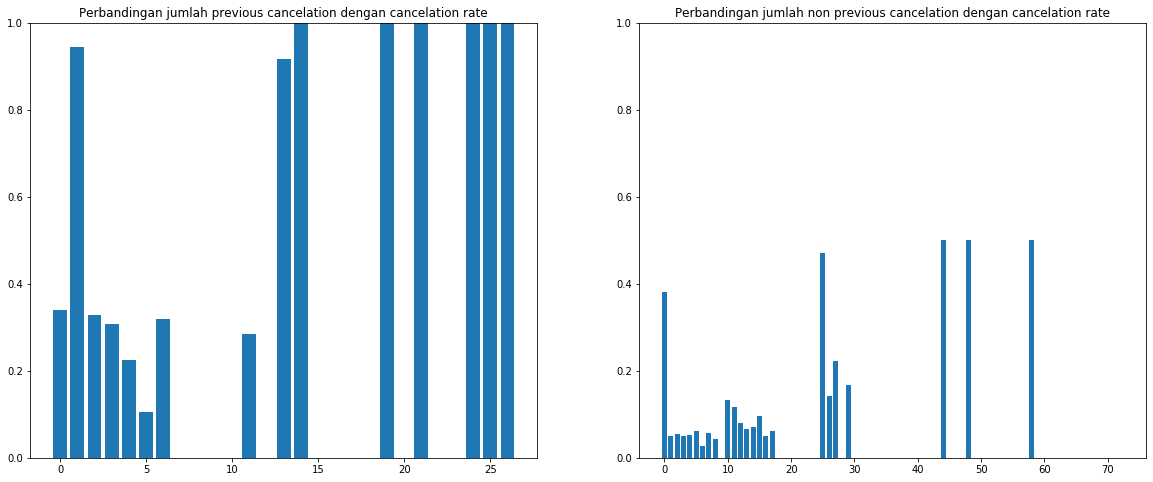

In [50]:
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("Perbandingan jumlah previous cancelation dengan cancelation rate")
ax2.set_title("Perbandingan jumlah non previous cancelation dengan cancelation rate")

ax1.set_ylim([0,1])
ax2.set_ylim([0,1])

ax1.bar(data_prev_cancel['previous_cancellations'], data_prev_cancel['is_canceled'])
ax2.bar(data_prev_not_cancel['previous_bookings_not_canceled'], data_prev_not_cancel['is_canceled'])

In [51]:
#cek apakah orang yang non previous cancelation >= 20 merupakan repeated guess?

data.loc[(data['previous_bookings_not_canceled']>=20)]['is_repeated_guest'].value_counts()

1    121
0     26
Name: is_repeated_guest, dtype: int64

In [52]:
data.loc[(data['previous_bookings_not_canceled']>=20)][['is_repeated_guest', 'is_canceled']].groupby('is_repeated_guest', as_index=False).mean()

,is_repeated_guest,is_canceled
0,0,0.384615
1,1,0.041322


### Hasil Observasi:
1. Repeated guest punya peluang cancel yang lebih rendah; sayangnya repeated guest proporsinya sangat kecil
2. Orang yang pernah cancel sekali & cancel lebih dari 12 kali, memiliki peluang cancel yang lebih besar. Kemungkinan besar lebih ke orang yang sering cancel, bakal selalu sering cancel
3. Nilai 'previous_bookings_not_canceled' mayoritas 0, menandakan mayoritas orang-orang yang pesan merupakan pelanggan baru
4. Secara umum, orang yang sudah pernah punya historis non previous cancelation memiliki peluang cancel lebih kecil.
5. Orang yang memiliki non previous cancelation >=20 mayoritas merupakan repeated guess, tapi ada sebagian yang tidak juga.
<ul><li> Orang yang repeated guest & order >=20 memiliki cancelation rate yang sangat rendah, bahkan di bawah 5%!</li><li> Sebaliknya, orang yang bukan repeated guest memiliki cancelation rate yang sangat tinggi, hingga 38%</li></ul>

## 11. Pengaruh Kesesuaian Tipe Kamar

In [53]:
data['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [54]:
data[['is_canceled','reserved_room_type']].groupby('reserved_room_type', as_index=False).mean()

,reserved_room_type,is_canceled
0,A,0.391074
1,B,0.329159
2,C,0.330472
3,D,0.317796
4,E,0.292884
5,F,0.303763
6,G,0.364374
7,H,0.407654
8,L,0.333333
9,P,1.000000


In [55]:
data['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [56]:
data[['is_canceled','assigned_room_type']].groupby('assigned_room_type', as_index=False).mean()

,assigned_room_type,is_canceled
0,A,0.444925
1,B,0.236708
2,C,0.187789
3,D,0.251244
4,E,0.252114
5,F,0.247134
6,G,0.305523
7,H,0.352528
8,I,0.013774
9,K,0.043011


In [57]:
data_room = data[['is_canceled','reserved_room_type','assigned_room_type']]
data_room['same_room'] = data_room['reserved_room_type'] == data_room['assigned_room_type']
data_room['same_room'].value_counts()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


True     104473
False     14917
Name: same_room, dtype: int64

In [58]:
data_room[['is_canceled','same_room']].groupby('same_room').mean()

,is_canceled
same_room,
False,0.053764
True,0.415629


### Hasil Observasi:
1. Tidak ada pengaruh signifikan antara reserved room type dengan cancelation rate (semua berada di kisaran 30-40% cancelation rate) kecuali kamar tipe P tapi jumlah pemesanannya sangat insignifikan
2. Ada pengaruh signifikan antara assigned room type dengan cancelation rate. ruang tipe I & K memiliki cancelation rate yang sangat rendah, sedangkan kamar A cenderung memiliki cancelation rate yang lebih tinggi
3. Ketika Ruang kamar yang ditawarkan tidak sesuai pesanan, cancelation rate justru menjadi lebih rendah. Hal ini mungkin terjadi karena untuk memastikan suatu konsumen mendapatkan ruangan tertentu, haruslah customer tersebut datang pada hari H pemesanan.

#### Conclusion:
1. Menambah fitur penggambar apakah suatu ruangan yang diterima oleh customer sesuai atau tidak
2. drop reserved room type
3. Pertahankan assigned room type untuk tipe I, K, A, dan 'Lain'
4. Bisa pertimbangkan untuk tambah tipe assigned room untuk L & P

## 12. Pengaruh Frekuensi Perubahan Booking

In [59]:
data['booking_changes'].value_counts()

0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
11         2
12         2
16         2
17         2
20         1
18         1
21         1
Name: booking_changes, dtype: int64

In [60]:
data.groupby('booking_changes')['is_canceled'].mean()

booking_changes
0     0.408542
1     0.142272
2     0.201314
3     0.155340
4     0.178191
5     0.169492
6     0.285714
7     0.096774
8     0.235294
9     0.125000
10    0.166667
11    0.000000
12    0.000000
13    0.000000
14    0.200000
15    0.000000
16    0.500000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
Name: is_canceled, dtype: float64

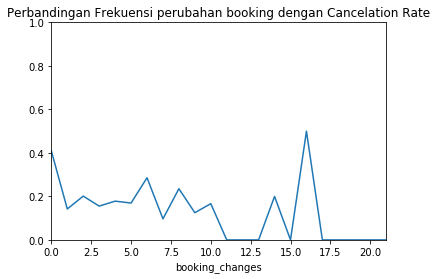

In [61]:
data.groupby('booking_changes')['is_canceled'].mean().plot(ylim=([0,1]), title="Perbandingan Frekuensi perubahan booking dengan Cancelation Rate")

Text(0.5, 1.0, 'Perbandingan Frekuensi perubahan booking dengan Cancelation Rate')

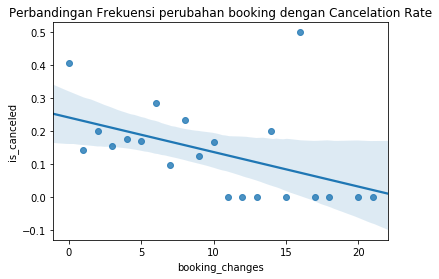

In [62]:
data_booking_change = data.groupby('booking_changes', as_index=False)['is_canceled'].mean()
sns.regplot(data_booking_change['booking_changes'], data_booking_change['is_canceled']).set_title("Perbandingan Frekuensi perubahan booking dengan Cancelation Rate")

Text(0.5, 1.0, 'Perbandingan Frekuensi perubahan booking dengan Cancelation Rate\n tanpa memperhitungkan booking tanpa perubahan')

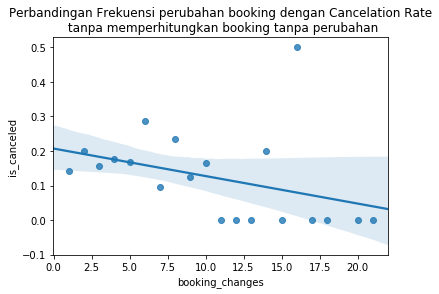

In [63]:
#periksa trend apabila kita tidak melibatkan data booking changes = 0
data_booking_change_2 = data.loc[data['booking_changes']!=0].groupby('booking_changes', as_index=False)['is_canceled'].mean()
sns.regplot(data_booking_change_2['booking_changes'], data_booking_change_2['is_canceled']).set_title("Perbandingan Frekuensi perubahan booking dengan Cancelation Rate\n tanpa memperhitungkan booking tanpa perubahan")

## Hasil Observasi:
1. Orang yang setidaknya pernah melakukan perubahan booking sekali, memiliki peluang cancelation yang lebih rendah. Mungkin ini menandakan pola perilaku ketika orang sudah merubah booking mereka, hal tersebut menandakan bahwa mereka menaruh effort & lebih cenderung untuk mempertahankan booking tersebut untuk kedepannya.
2. Secara umum, semakin banyak jumlah booking changes, semakin berkurang kemungkinan cancel booking

#### Conclusion:
1. Pertahankan fitur booking changes
2. Tambahkan boolean dari "pernah merubah book" atau tidak

## 13. Pengaruh Tipe Deposit

In [64]:
data['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [65]:
data.groupby('deposit_type')['is_canceled'].mean()

deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: is_canceled, dtype: float64

### Hasil Observasi:
1. Terdapat anomali pada bagian deposit non-refund yang mana ternyata memiliki cancelation rate yang sangat tinggi. Mungkin saja karena bentuk deposit untuk non refund berupa deposit sebagian (nominalnya kecil). tapi ini tetaplah menjadi suatu anomali data.
2. Cancelation rate untuk no deposit & refundable cenderung memiliki peluang pengembalian yang mirip

#### Conclusion:
1. Menggabungkan no deposit & refundable apabila diperlukan

## 14. Pengaruh Travel Agent

In [66]:
data['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
213.0        1
433.0        1
197.0        1
367.0        1
337.0        1
Name: agent, Length: 333, dtype: int64

In [67]:
data[data['agent'].map(data['agent'].value_counts()>500).fillna(False)]['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
6.0       3290
250.0     2870
241.0     1721
28.0      1666
8.0       1514
3.0       1336
37.0      1230
19.0      1061
40.0      1039
314.0      927
21.0       875
229.0      786
242.0      780
83.0       696
29.0       683
171.0      607
12.0       578
85.0       554
20.0       540
96.0       537
243.0      514
Name: agent, dtype: int64

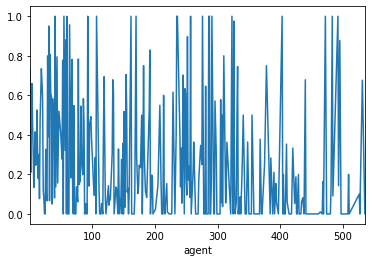

In [68]:
data.groupby(['agent'])['is_canceled'].mean().plot()

In [69]:
top_agent = data.groupby(['agent'],as_index=False)['is_canceled'].count().sort_values('is_canceled', ascending=False)['agent'][0:8].tolist()
data.loc[data['agent'].isin(top_agent)].groupby(['agent'],as_index=False)['is_canceled'].mean()

,agent,is_canceled
0,1.0,0.734251
1,6.0,0.311550
2,7.0,0.133936
3,9.0,0.415006
4,14.0,0.179121
5,240.0,0.393909
6,241.0,0.137130
7,250.0,0.178746


In [70]:
print(f"Cancelation rate tanpa agen: {data[data['agent'].isnull()]['is_canceled'].mean()}%")
print(f"Cancelation rate dengan agen: {data[data['agent'].notnull()]['is_canceled'].mean()}%")

Cancelation rate tanpa agen: 0.24663402692778458%
Cancelation rate dengan agen: 0.39004366812227076%


### Hasil Observasi:
1. Booking didominasi oleh agent nomor 9 > 240 > 1
2. Berdasarkan top 8 agent penyelenggara booking, didapati bahwa agent 1 memiliki cancelation rate paling tinggi (hingga 73%), selain itu terdapat beberapa variasi cancelation rate berdasarkan jenis agent
3. Tanpa agen punya cancelation rate lebih rendah daripada dengan agen

#### Conclusion:
1. Isi missing value dengan asumsi Null = tanpa agen.
2. Pertimbangin buat Kategori untuk setiap agent yang sudah menyelenggarakan booking lebih dari 1000 booking. Keterangan sbb:
<ul><li> Resiko tinggi lebih dari 50%</li><li> Resiko menengah 25-50%</li><li> Resiko rendah kurang dari 25% </li><li> kurang dari 1000 penjualan </li></ul>
3. New feature 'use_agent' boolean

## 15. Pengaruh Pemesanan dari Entitas Perusahaan

In [71]:
print("missing value: ", data['company'].isna().sum())
print("total data: ",len(data['company']))
print(f"persentase missing value: {100*data['company'].isna().sum()/len(data['company'])}%")

missing value:  112593
total data:  119390
persentase missing value: 94.30689337465449%


In [72]:
data['company'].value_counts()

40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
229.0      1
213.0      1
416.0      1
320.0      1
461.0      1
Name: company, Length: 352, dtype: int64

In [73]:
print(f"Banyak company: {len(data['company'].unique())}")

Banyak company: 353


In [74]:
print(f"Cancelation rate untuk non-company: {data.loc[data['company'].isna(), 'is_canceled'].mean()}%")
print(f"Cancelation rate untuk company: {data.loc[data['company'].notnull(), 'is_canceled'].mean()}%")

Cancelation rate untuk non-company: 0.3821996038830123%
Cancelation rate untuk company: 0.1752243636898632%


### Hasil Observasi
1. Jumlah company lumayan banyak (lebih dari 350), sangat tidak feasible untuk encoding
2. Cancelation rate untuk company lebih rendah daripada cancelation rate untuk non-company

#### Conclusion
1. Memetakan order yang memakai atas nama suatu perusahaan dan yang tidak

## 16. Pengaruh Lama waktu di waiting list

In [75]:
data['days_in_waiting_list'].value_counts()

0      115692
39        227
58        164
44        141
31        127
        ...  
175         1
117         1
89          1
92          1
183         1
Name: days_in_waiting_list, Length: 128, dtype: int64

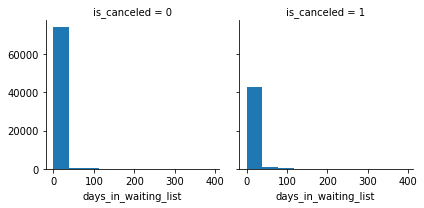

In [76]:
g = sns.FacetGrid(data, col='is_canceled')
g.map(plt.hist, 'days_in_waiting_list')

In [77]:
print(f"Persentase cancelation rate ketika tidak waiting: {data.loc[data['days_in_waiting_list']==0, 'is_canceled'].mean()}%")
print(f"Persentase cancelation rate ketika waiting: {data.loc[data['days_in_waiting_list']!=0, 'is_canceled'].mean()}%")

Persentase cancelation rate ketika tidak waiting: 0.36186598900528993%
Persentase cancelation rate ketika waiting: 0.6379123850730124%


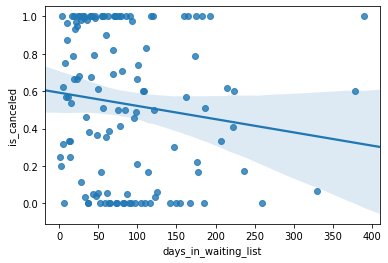

In [78]:
data_non_wait = data.loc[data['days_in_waiting_list']!=0].groupby('days_in_waiting_list', as_index=False)['is_canceled'].mean()
sns.regplot(data_non_wait['days_in_waiting_list'], data_non_wait['is_canceled'])

### Hasil Observasi
1. Ketika disuruh menunggu (masuk waiting list), customer lebih berpeluang untuk membatalkan order
2. Semakin lama berada dalam waiting list, kemungkinan cancel semakin rendah

#### Conclusion:
1. Pertahankan kolom day in waiting list
2. Tambah kolom boolean pernah masuk waiting list atau tidak

## 17. Pengaruh jenis customer

In [79]:
data['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [80]:
data.groupby(['customer_type'])['is_canceled'].mean()

customer_type
Contract           0.309617
Group              0.102253
Transient          0.407463
Transient-Party    0.254299
Name: is_canceled, dtype: float64

### Hasil Observasi
1. jenis transient lebih berpeluang untuk cancel

## 18. Pengaruh ADR (Average Daily Rate)

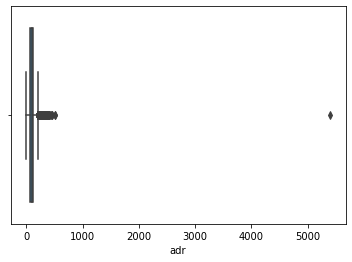

In [81]:
sns.boxplot(data['adr'])

In [82]:
data.loc[data['adr']> 1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


Text(0.5, 1.0, 'Perbandingan ADR terhadap cancelation rate')

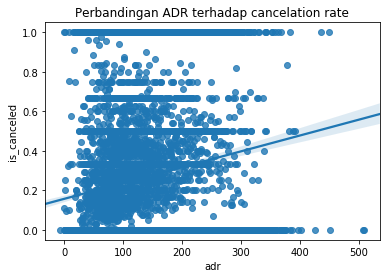

In [83]:
data_adr = data.loc[data['adr']< 1000].groupby(['adr'], as_index=False)['is_canceled'].mean()
sns.regplot(data_adr['adr'], data_adr['is_canceled']).set_title("Perbandingan ADR terhadap cancelation rate")

### Hasil Observasi:
1. Terdapat 2 row data outlier yang berpotensi menjadi noise jika diabaikan
2. Terdapat trend positif antara ADR dengan tingkat pembatalan

#### Conclusion:
1. drop data outlier
2. pertahankan ADR

## 19. Pengaruh Jumlah Kebutuhan Parking space

In [84]:
data['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

In [85]:
data.groupby(['required_car_parking_spaces'])['is_canceled'].mean()

required_car_parking_spaces
0    0.394949
1    0.000000
2    0.000000
3    0.000000
8    0.000000
Name: is_canceled, dtype: float64

### Hasil Observasi:
1. Order yang meminta parking space tidak pernah cancel.

#### Conclusion:
1. Dalam rangka simplifikasi model, ubah data menjadi boolean apakah meminta parking space atau tidak

## 20. Pengaruh jumlah special request

In [86]:
data['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

Text(0.5, 1.0, 'Hubungan jumlah special request terhadap cancelation rate')

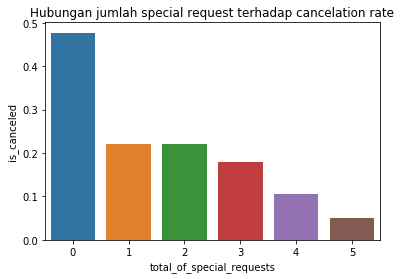

In [87]:
data_req = data.groupby('total_of_special_requests', as_index=False)['is_canceled'].mean()
sns.barplot(data_req['total_of_special_requests'], data_req['is_canceled']).set_title("Hubungan jumlah special request terhadap cancelation rate")

### Hasil Observasi:
1. Semakin banyak jumlah special request, semakin kecil kemungkinan pembatalan order

# Data Preparation

In [88]:
# import ulang dataset
data = pd.read_csv("hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## 1. Fixing Missing Value

In [89]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### 1.1. 'agent': Ubah missing value sebagai 'tanpa agen'

In [90]:
data['agent'].fillna(0, inplace=True)

### 1.2.  'company': Ubah missing value sebagai 'bukan company'

In [91]:
data['company'].fillna(0, inplace=True)

### 1.3. Drop fitur lain yang masih memiliki missing value

In [92]:
data.dropna(inplace=True)

In [93]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## 2. Removing Outlier

In [94]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,74.896264,10.562709,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,107.145761,53.513170,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


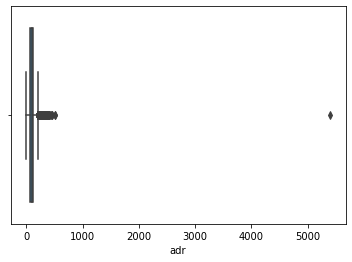

In [95]:
sns.boxplot(data['adr'])

### Removing ADR outlier

In [96]:
data.drop(data[data['adr']>1000].index, inplace=True)
data.drop(data[data['adr']<0].index, inplace=True)

In [97]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000,118896.000000
mean,0.371350,104.311255,2016.157650,27.166818,15.800893,0.928879,2.502128,1.858389,0.104209,0.007948,0.032003,0.087143,0.131619,0.221160,74.895127,10.562887,2.330793,101.959594,0.061886,0.571693
std,0.483168,106.903696,0.707461,13.589932,8.780302,0.996181,1.900152,0.578580,0.399175,0.097381,0.176008,0.845876,1.484674,0.652766,107.144966,53.513603,17.630598,48.090374,0.244174,0.792681
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000


## 3. Changing Data Type

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118896 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             118896 non-null object
is_canceled                       118896 non-null int64
lead_time                         118896 non-null int64
arrival_date_year                 118896 non-null int64
arrival_date_month                118896 non-null object
arrival_date_week_number          118896 non-null int64
arrival_date_day_of_month         118896 non-null int64
stays_in_weekend_nights           118896 non-null int64
stays_in_week_nights              118896 non-null int64
adults                            118896 non-null int64
children                          118896 non-null float64
babies                            118896 non-null int64
meal                              118896 non-null object
country                           118896 non-null object
market_segment                    118896 non-null object
distribution_channel              118896 n

### Changing data type for hotel

In [99]:
data['hotel'] = data['hotel']=="Resort Hotel"
data['hotel']

0          True
1          True
2          True
3          True
4          True
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: hotel, Length: 118896, dtype: bool

## 4. Feature Engineering + Penghapusan non-beneficial feature 

### 4.1. 'stay_days' + remove: 'stays_in_weekend_nights' & 'stays_in_week_nights'
stay_days = stays_in_weekend_nights + stays_in_week_nights

#### Definisi umum:
Merupakan fitur yang mewakilkan lama hari menginap suatu pesanan hotel. 

#### Alasan:
1. Simplifikasi model
2. fitur 'stays_in_weekend_nights' & 'stays_in_week_nights' memiliki pola yang mirip

In [100]:
data['stay_days'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis = 1, inplace=True)

### 4.2. 'children_babies' + remove: 'children' & 'babies'

In [101]:
data['children_babies'] = data['children'] + data['babies']
data.drop(['children','babies'],axis = 1, inplace=True)

### 4.3. 'country_portugal' & 'benua'  + remove: 'country'

In [102]:
#ubah semua country code menjadi kode benua kecuali untuk portugal
data['continent'] = (data.loc[data['country']!='PRT', ['country']])['country'].apply(convert_benua)

#rename portugal
data['continent'].fillna("country_portugal", inplace=True)

#delete country
data.drop(['country'],axis=1, inplace=True)

### 4.4. 'same_room' + remove: 'reserved_room_type'

In [103]:
#same_room
data['same_room'] = data['reserved_room_type'] == data['assigned_room_type']

#delete reserved_room_type
data.drop(['reserved_room_type'], axis=1, inplace=True)

### 4.5. 'ever_change_book'

In [104]:
data['ever_change_book'] = data['booking_changes'] != 0

### 4.6. 'company_book' + remove: 'company'

In [105]:
data['company_book'] = data['company']!=0
data.drop(['company'], axis=1, inplace=True)

### 4.7. 'ever_wait'

In [106]:
data['ever_wait'] = data['days_in_waiting_list']!=0

### 4.8. 'parking_space_request' + remove: 'required_car_parking_spaces'

In [107]:
# parking_space_request
data['parking_space_request'] = data['required_car_parking_spaces'] != 0

#delete required_car_parking_spaces
data.drop(['required_car_parking_spaces'], axis=1, inplace=True)

### 4.9. remove: 'arrival_date_day_of_month', 'arrival_date_year', & 'arrival_date_month'

In [108]:
data.drop(['arrival_date_day_of_month', 'arrival_date_year', 'arrival_date_month'], axis=1, inplace=True)

### 4.10. remove: 'reservation_status' & 'reservation_status_date'

In [109]:
data.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)

### 4.11. 'use_agent'

In [110]:
data['use_agent'] = data['agent'] != 0 

### 4.12. masking: encoding 'market_segment ': (MS_Groups, MS_TA/TO, MS_Lain)

In [111]:
data['market_segment'].unique().tolist()

['Direct',
 'Corporate',
 'Online TA',
 'Offline TA/TO',
 'Complementary',
 'Groups',
 'Aviation']

In [112]:
# MS_TA/TO
data.loc[data['market_segment'].isin(['Online TA','Offline TA/TO']), 'market_segment'] = "MS_TA/TO"

# MS_Lain
data.loc[data['market_segment'].isin(['Direct','Corporate','Complementary','Aviation']), 'market_segment'] = "MS_Lain"

# MS_Groups
data.loc[data['market_segment']=='Groups', 'market_segment'] = "MS_Groups"

### 4.13. masking: encoding 'assigned_room_type': (room_I, room_K, room_A, room_Lain)

In [113]:
data['assigned_room_type'].unique().tolist()

['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P']

In [114]:
# Room_I
data.loc[data['assigned_room_type'] == 'I', 'assigned_room_type'] = "Room_I"

# Room_K
data.loc[data['assigned_room_type'] == 'K', 'assigned_room_type'] = "Room_K"

# Room_A
data.loc[data['assigned_room_type'] == 'A', 'assigned_room_type'] = "Room_A"

# Room_Lain
data.loc[~data['assigned_room_type'].isin(['I','K','A']), 'assigned_room_type'] = "Room_Lain"

### 4.14. One-hot-encoding

In [115]:
encode_list = ['meal', 'continent', 'distribution_channel', 'customer_type', 'deposit_type','market_segment','assigned_room_type']
data = pd.get_dummies(data=data, columns = encode_list)

In [116]:
data_no_agent = data.drop(['agent'],axis=1)

### 4.15 'agent_risk'

#### Notes:
Perlu dilakukan spliting terlebih dahulu sebelum klasifikasi 'agent risk', hal ini guna mencegah data train & data test tercampur (mencegah ***Data Leakage***).

In [117]:
# # train test split

# from sklearn.model_selection import train_test_split
# train, test = train_test_split(data, test_size=0.3, random_state=1)

In [118]:
# # agent_risk
# train ['agent_risk'] = train['agent'].map(train.groupby(['agent'])['is_canceled'].mean())
# test ['agent_risk'] = test['agent'].map(train.groupby(['agent'])['is_canceled'].mean())

In [119]:
# # delete 'agent'
# train.drop(['agent'],axis=1,inplace=True)
# test.drop(['agent'],axis=1,inplace=True)

# Modelling

## Splitting X & y

In [120]:
# xtrain = train.drop(['is_canceled'], axis=1)
# xtest = test.drop(['is_canceled'], axis=1)
# ytrain = train['is_canceled']
# ytest = test['is_canceled']

In [121]:
x = data_no_agent.drop(['is_canceled'], axis=1)
y = data_no_agent['is_canceled']

## Test Model

In [122]:
#Define cross validation indices generator
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=1, shuffle=True)

#define package keperluan lainnya
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2, f_classif

#Define evaluation metrics yang digunakan, yaitu f1_score
from sklearn.metrics import f1_score

#define model yang digunakan
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#define keperluan hyperparameter tunning
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression

In [123]:
x_lr = x.copy()
y_lr = y.copy()

lr = LogisticRegression(verbose=0)
score_lr = cross_val_score(lr, x_lr, y_lr, cv=kf, scoring='f1')
print(score_lr)
print(f"Akurasi Model: {np.mean(score_lr)}")

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.71100799 0.70637922 0.71625796 0.69680406 0.70925534]
Akurasi Model: 0.7079409155175331


### 2. Random Forest Classifier

In [124]:
x_rfc = x.copy()
y_rfc = y.copy()

rlc = RandomForestClassifier(random_state=1, verbose=0)
score_rlc = cross_val_score(rlc, x_rfc, y_rfc, cv=kf, scoring='f1')
print(score_rlc)
print(f"Akurasi Model: {np.mean(score_rlc)}")

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

[0.81886336 0.8153819  0.82085657 0.81656947 0.81733333]
Akurasi Model: 0.8178009258482355


### 3. XGBoost

In [125]:
x_xgb = x.copy()
y_xgb = y.copy()

xgb = XGBClassifier(random_state=1, verbose=0)
score_xgb = cross_val_score(xgb, x_xgb, y_xgb, cv=kf, scoring='f1')
print(score_xgb)
print(f"Akurasi Model: {np.mean(score_xgb)}")

[0.8126753  0.80755291 0.81615829 0.80578709 0.80990052]
Akurasi Model: 0.8104148196196235


### 4. CatBoost

In [126]:
x_cbc = x.copy()
y_cbc = y.copy()

cbc = CatBoostClassifier(random_state=1, verbose=0)
score_cbc = cross_val_score(cbc, x_cbc, y_cbc, cv=kf, scoring='f1')
print(score_cbc)
print(f"Akurasi Model: {np.mean(score_cbc)}")

[0.81386209 0.81102546 0.82132615 0.80861729 0.81395906]
Akurasi Model: 0.8137580120446974


### [ ! ] Result:

1. LogisticRegression memiliki hasil akurasi yang lebih rendah jika dibandingkan dengan model lainnya.
2. Terdapat 3 model potensial yaitu Random Forest, XGBoost, dan CatBoost

## Feature Selection

In [128]:
x.shape
# Kondisi awal terdapat 48 fitur. Akan dilakukan proses feature selection untuk mereduksi dimensi / tingkat kompleksitas dari model

(118896, 48)

### 1. Random Forest

In [129]:
X_rf = x.copy()
y_rf = y.copy()
rfecv_rf = RFECV(RandomForestClassifier(random_state=1, n_estimators = 10), scoring = 'f1', step=2, cv=kf)
rfecv_rf.fit(X_rf, y_rf)
print('Optimal number of features :', rfecv_rf.n_features_)
print('Best features :', X_rf.columns[rfecv_rf.support_]) # rfecv.support --> ambil indices

Optimal number of features : 40
Best features : Index(['hotel', 'lead_time', 'arrival_date_week_number', 'adults',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'total_of_special_requests', 'stay_days',
       'children_babies', 'same_room', 'ever_change_book', 'company_book',
       'ever_wait', 'parking_space_request', 'use_agent', 'meal_BB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'continent_AF', 'continent_AS',
       'continent_EU', 'continent_NA', 'continent_SA',
       'continent_country_portugal', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_TA/TO',
       'customer_type_Contract', 'customer_type_Transient',
       'customer_type_Transient-Party', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'market_segment_MS_Groups',
       'market_segment_MS_Lain', 'market_segment_MS_TA/TO'],
      dtype='object')


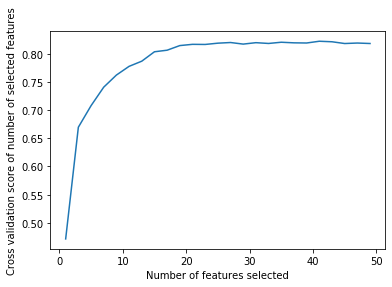

In [130]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, 2*len(rfecv_rf.grid_scores_)+ 1, 2), rfecv_rf.grid_scores_)
plt.show()

In [132]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_rf.columns),
                                      'Ranking':rfecv_rf.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,hotel,1
46,market_segment_MS_TA/TO,1
24,continent_AF,1
25,continent_AS,1
26,continent_EU,1
27,continent_NA,1
30,continent_SA,1
31,continent_country_portugal,1
32,distribution_channel_Corporate,1
33,distribution_channel_Direct,1


In [133]:
x_rfc_fs = rfecv_rf.transform(x.copy())
y_rfc_fs = y.copy()

rlc = RandomForestClassifier(random_state=1, verbose=0)
score_rlc_fs = cross_val_score(rlc, x_rfc_fs, y_rfc_fs, cv=kf, scoring='f1')
print(score_rlc_fs)
print(f"Akurasi Model: {np.mean(score_rlc_fs)}")

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

[0.82307413 0.82284973 0.82198426 0.81951103 0.81869431]
Akurasi Model: 0.8212226922323879


In [392]:
# peningkatan
print(f"Akurasi Model awal: {np.mean(score_rlc)}")
print(f"Akurasi Model feature selection: {np.mean(score_rlc_fs)}")
print(f"Selisih Akurasi Model: {np.mean(score_rlc_fs) - np.mean(score_rlc)}")

Akurasi Model awal: 0.8178009258482355
Akurasi Model feature selection: 0.8212226922323879
Selisih Akurasi Model: 0.0034217663841523693


### Conclusion:
1. Setelah dilakukan pemilihan fitur, didapatkan penghapusan 8 fitur.
2. Feature selection pada model Random Forest mengakibatkan terjadinya peningkatan akurasi sebesar 0,35%

### 2. XGBoost

In [134]:
# X_xgb = X.copy()
# y_xgb = y.copy()
# rfecv_xgb = RFECV(XGBClassifier(random_state=1), scoring = 'f1', step=1, cv=5)
# rfecv_xgb.fit(X_xgb, y_xgb)
# print('Optimal number of features :', rfecv_rf.n_features_)
# print('Best features :', X_xgb.columns[rfecv_rf.support_]) # rfecv.support --> ambil indices

#### Ternyata XGBoost versi >1.0 tidak mendukung fitur RFECV. Proses pemilihan fitur akan dilakukan menggunakan teknik yang lain.

In [135]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectFromModel

In [136]:
# X_xgb = X.copy().to_numpy()
# y_xgb = y.copy().to_numpy()

# xtrain, xtest, ytrain, ytest = train_test_split(X_xgb, y_xgb, random_state=1, test_size = 0.2)

# xgb = XGBClassifier(random_state=1)
# xgb.fit(xtrain, ytrain)

# thresholds = np.sort(xgb.feature_importances_)

# for i in thresholds:
#     selected_xtrain = SelectFromModel(xgb, threshold=i, prefit=True).transform(xtrain)
#     selected_xtest = SelectFromModel(xgb, threshold=i, prefit=True).transform(xtest)
#     xgbfs = XGBClassifier(random_state=1)
#     xgbfs.fit(selected_xtrain, ytrain)
#     score = f1_score(xgbfs.predict(selected_xtest),ytest)
#     print("Threshold: {:.3f}, n: {}, Accuracy: {:.2f}%".format(i, selected_xtrain.shape[1], score*100))

#### the same things happend for SelectFromModel, Proses pemilihan fitur akan dilakukan menggunakan teknik yang lain

In [401]:
x_xgb_fs = x.copy().iloc[:,SelectKBest(chi2, k=35).fit(x.copy(), y.copy()).get_support()].to_numpy()
y_xgb_fs = y.copy()

xgb = XGBClassifier(random_state=1, verbose=0)

score_xgb_fs = cross_val_score(xgb, x_xgb_fs, y_xgb_fs, cv=kf, scoring='f1')
print(score_xgb_fs)
print(f"Akurasi Model: {np.mean(score_xgb_fs)}")

[0.80442716 0.80194084 0.81247793 0.80172002 0.80216867]
Akurasi Model: 0.8045469245414261


In [400]:
# peningkatan
print(f"Akurasi Model awal: {np.mean(score_xgb)}")
print(f"Akurasi Model feature selection: {np.mean(score_xgb_fs)}")
print(f"Selisih Akurasi Model: {np.mean(score_xgb_fs) - np.mean(score_xgb)}")

Akurasi Model awal: 0.8104148196196235
Akurasi Model feature selection: 0.8064004178941225
Selisih Akurasi Model: -0.004014401725500938


In [404]:
x_xgb_fs = x.copy().iloc[:,SelectKBest(f_classif, k=40).fit(x.copy(), y.copy()).get_support()].to_numpy()
y_xgb_fs = y.copy()

xgb = XGBClassifier(random_state=1, verbose=0)

score_xgb_fs = cross_val_score(xgb, x_xgb_fs, y_xgb_fs, cv=kf, scoring='f1')
print(score_xgb_fs)
print(f"Akurasi Model: {np.mean(score_xgb_fs)}")

D:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [47] are constant.
  UserWarning)
D:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[0.7994247  0.7982888  0.8051137  0.79503924 0.79754675]
Akurasi Model: 0.7990826386099312


In [405]:
# peningkatan
print(f"Akurasi Model awal: {np.mean(score_xgb)}")
print(f"Akurasi Model feature selection: {np.mean(score_xgb_fs)}")
print(f"Selisih Akurasi Model: {np.mean(score_xgb_fs) - np.mean(score_xgb)}")

Akurasi Model awal: 0.8104148196196235
Akurasi Model feature selection: 0.7990826386099312
Selisih Akurasi Model: -0.011332181009692244


### Conclusion:
1. Hasil-1: RFECV & Select From Model tidak dapat digunakan untuk XGBClassifier versi 1.0 ke atas.
2. Hasil-2: Tidak terdapat perubahan positif yang signifikan ketika dilakukan feature selection menggunakan SelectKBest dengan scoring chi2
3. Hasil-3: Tidak terdapat perubahan positif yang signifikan ketika dilakukan feature selection menggunakan SelectKBest dengan scoring f_classif

### 3. CatBoost

In [406]:
x_cbc_fs = x.copy()
y_cbc_fs = y.copy()

cbc = CatBoostClassifier(random_state=1, verbose = 0)
rfecv_cbc = RFECV(cbc, scoring = 'f1', step = 2, cv=kf)
rfecv_cbc.fit(x_cbc_fs, y_cbc_fs)

D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 d

RFECV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
      estimator=<catboost.core.CatBoostClassifier object at 0x000001A3A5F98508>,
      min_features_to_select=1, n_jobs=None, scoring='f1', step=2, verbose=0)

In [407]:
print('Optimal number of features :', rfecv_cbc.n_features_)
print('Best features :', x_cbc_fs.columns[rfecv_cbc.support_]) # rfecv.support --> ambil indices

Optimal number of features : 36
Best features : Index(['hotel', 'lead_time', 'arrival_date_week_number', 'adults',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'total_of_special_requests', 'stay_days',
       'children_babies', 'same_room', 'ever_change_book', 'company_book',
       'parking_space_request', 'use_agent', 'meal_BB', 'meal_HB', 'meal_SC',
       'meal_Undefined', 'continent_AS', 'continent_EU',
       'continent_country_portugal', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_TA/TO',
       'customer_type_Contract', 'customer_type_Transient',
       'customer_type_Transient-Party', 'deposit_type_No Deposit',
       'deposit_type_Non Refund', 'market_segment_MS_Groups',
       'market_segment_MS_Lain', 'market_segment_MS_TA/TO'],
      dtype='object')


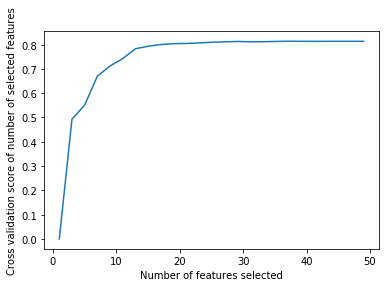

In [408]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, 2*len(rfecv_cbc.grid_scores_) + 1, 2), rfecv_cbc.grid_scores_)
plt.show()

In [409]:
x_cbc_fs = rfecv_cbc.transform(x.copy())
y_cbc_fs = y.copy()

cbc = CatBoostClassifier(random_state=1, verbose = 0)
score_cbc_fs = cross_val_score(cbc, x_cbc_fs, y_cbc_fs, cv = kf, scoring = 'f1')
print(score_cbc_fs)
print(f"Akurasi Model: {np.mean(score_cbc_fs)}")

[0.8132785  0.81286481 0.8226194  0.80969436 0.81042937]
Akurasi Model: 0.8137772906054174


In [410]:
# peningkatan
print(f"Akurasi Model awal: {np.mean(score_cbc)}")
print(f"Akurasi Model feature selection: {np.mean(score_cbc_fs)}")
print(f"Selisih Akurasi Model: {np.mean(score_cbc_fs) - np.mean(score_cbc)}")

Akurasi Model awal: 0.8137580120446974
Akurasi Model feature selection: 0.8137772906054174
Selisih Akurasi Model: 1.9278560719926396e-05


### Conclusion:
1. Setelah dilakukan feature selection, didapati pembuangan 12 fitur
2. Jika dibandingkan, terdapat peningkatan akurasi yang relatif sangat kecil bahkan tidak signifikan
3. Tetap dilakukan proses feature selection guna memperkecil tingkat kompleksitas model

In [ ]:
print(f"Akurasi Model random forest: {np.mean(score_rf_fs)}")
print(f"Akurasi Model XGBoost: {np.mean(score_xgb)}")
print(f"Akurasi Model XGBoost: {np.mean(score_cbc_fs)}")

### Conclusion:
1. Sementara akan digunakan model Random Forest yang mana memiliki akurasi yang paling tinggi
2. Terdapat kemungkinan untuk melakukan stacking / ensamble kepada model random forest & cat boost.

## Hyperparameter Tunning

### 1. Random Forest

In [412]:
x_rf_ht = rfecv_rf.transform(x.copy())
y_rf_ht = y.copy()

rf = RandomForestClassifier(random_state=1) #bootstrap = True, criterion = 'gini'

param_grid_rf = {
    'max_features':[8,10,12],
    'n_estimators':[50,200,500]
}

gs_rf = GridSearchCV(rf, param_grid_rf, scoring='f1', cv=kf, verbose=0)
gs_rf.fit(x_rf_ht,y_rf_ht)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
      

In [413]:
print(f"best parameters: {gs_rf.best_params_}")
print(f"best score: {gs_rf.best_score_}")

best parameters: {'max_features': 10, 'n_estimators': 200}
best score: 0.8356215888365001


In [135]:
x_rfc_fs = rfecv_rf.transform(x.copy())
y_rfc_fs = y.copy()

rlc = RandomForestClassifier(random_state=1, verbose=0, max_features=10, n_estimators=200)
score_rlc_fs = cross_val_score(rlc, x_rfc_fs, y_rfc_fs, cv=kf, scoring='f1')
print(score_rlc_fs)
print(f"Akurasi Model: {np.mean(score_rlc_fs)}")

[0.83658047 0.83559439 0.83826087 0.83220209 0.83547009]
Akurasi Model: 0.8356215807715597


### Conclusion:
1. Hasil dari gridsearch mengatakan bahwa parameter terbaik untuk random forest pada kasus ini adalah sbb:
<ul><li>max_features = 10</li><li>n_estimators = 200 </li></ul>
2. Didapatkan hasil akurasi sementara sebesar 0.8356

## Model Stacking

In [449]:
x_stack = x.copy()
y_stack = y.copy()

xtrain, xval, ytrain, yval = train_test_split(x_stack, y_stack, random_state=1, test_size = 0.25, shuffle=True)


rfc = RandomForestClassifier(n_estimators=200, max_features=10, random_state=1, verbose=0)
xgb = XGBClassifier(random_state=1, verbose = 0)
cbc = CatBoostClassifier(random_state=1, verbose = 0)
meta_lr = LogisticRegression()

In [450]:
x_stack_rfc = rfecv_rf.transform(xtrain)
y_stack_rfc = ytrain

rfc.fit(x_stack_rfc, y_stack_rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [451]:
x_stack_xgb = xtrain
y_stack_xgb = ytrain

xgb.fit(x_stack_xgb, y_stack_xgb)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbose=0, verbosity=None)

In [453]:
x_stack_cbc = rfecv_cbc.transform(xtrain)
y_stack_cbc = ytrain

cbc.fit(x_stack_cbc, y_stack_cbc)

In [454]:
xval_meta = pd.DataFrame({
    'rfc_score':rfc.predict(rfecv_rf.transform(xval)),
    'xgb_score':xgb.predict(xval),
    'cbc_score':cbc.predict(rfecv_cbc.transform(xval))
})
yval_meta = yval

score_stacked = cross_val_score(meta_lr, xval_meta, yval_meta, cv=kf, scoring='f1')

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [455]:
print(score_stacked)
print(f"Akurasi Model: {np.mean(score_stacked)}")

[0.83046111 0.83434722 0.83200375 0.84338476 0.83666667]
Akurasi Model: 0.8353727008505007


### Conclusion:
1. Hasil akhir model 0.8316 yang mana lebih rendah daripada random forest yang sudah ditunning (0.8356)
2. Bisa jadi ini dipengaruhi oleh jumlah data train yang lebih sedikit (hanya 70% dari total data)

## Analisis feature importance

In [165]:
rlc.fit(x_rfc_fs, y_rfc_fs)
fi = {
    "feature": x.iloc[:,rfecv_rf.support_].columns,
    "feature importance": rlc.feature_importances_
}
fi_df = pd.DataFrame(fi)
fi_df.sort_values('feature importance', ascending=False, inplace=True)
fi_df

,feature,feature importance
1,lead_time,0.170981
9,adr,0.133918
2,arrival_date_week_number,0.101542
36,deposit_type_Non Refund,0.095082
35,deposit_type_No Deposit,0.075286
11,stay_days,0.055816
10,total_of_special_requests,0.045559
28,continent_country_portugal,0.039012
13,same_room,0.033949
25,continent_EU,0.029557


Text(0, 0.5, 'Feature Importance Score')

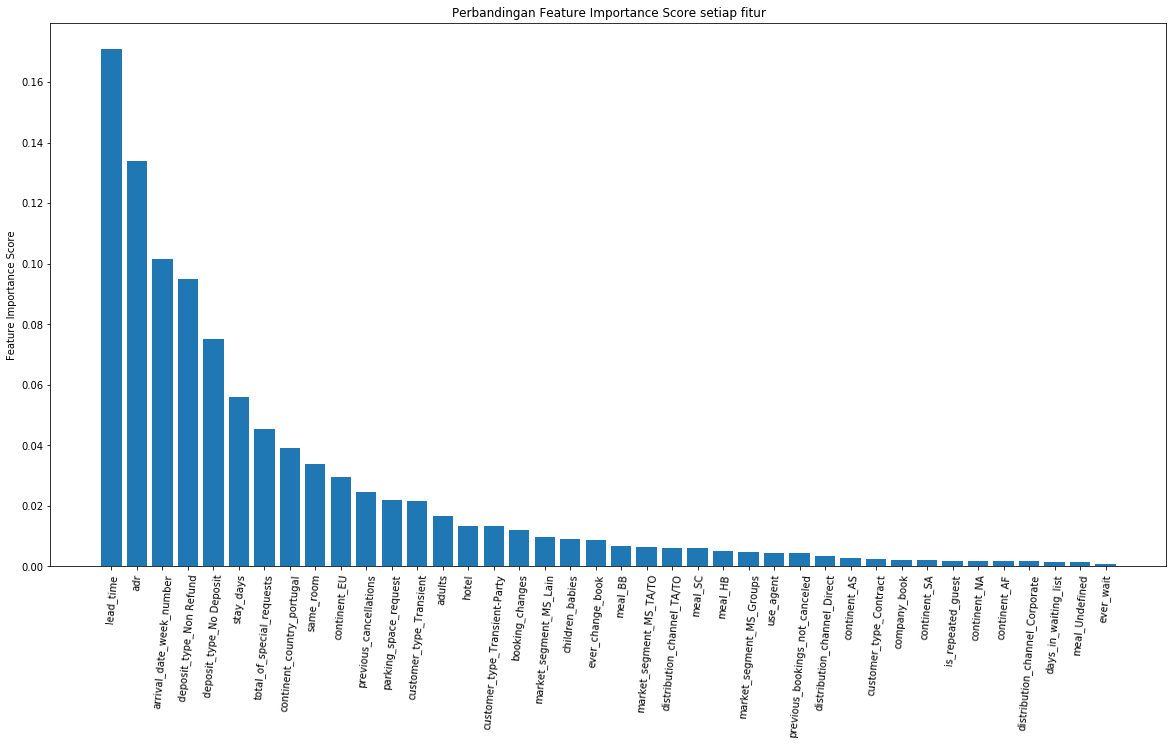

In [185]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 85)
plt.bar(fi_df['feature'], fi_df['feature importance'])
plt.title("Perbandingan Feature Importance Score setiap fitur")
plt.ylabel("Feature Importance Score")

#### Analisis Lead Time

In [247]:
# Perhitungan cancelation ratio per kelas lama lead time
data_lead_time = data[['is_canceled', 'lead_time']].copy()
data_lead_time['lead_time_class'] = pd.cut(data_lead_time['lead_time'], bins=(1 + 3.3*math.log(len(data_lead_time)))).cat.codes
data_lead_cancel_ratio = data_lead_time.groupby('lead_time_class')['is_canceled'].mean().dropna()

In [246]:
# perhitungan jumlah booking per kelas lama lead time
data_lead_number_book = data_lead_time.groupby('lead_time_class')['is_canceled'].count().dropna()

Text(0, 0.5, 'Jumlah Booking')

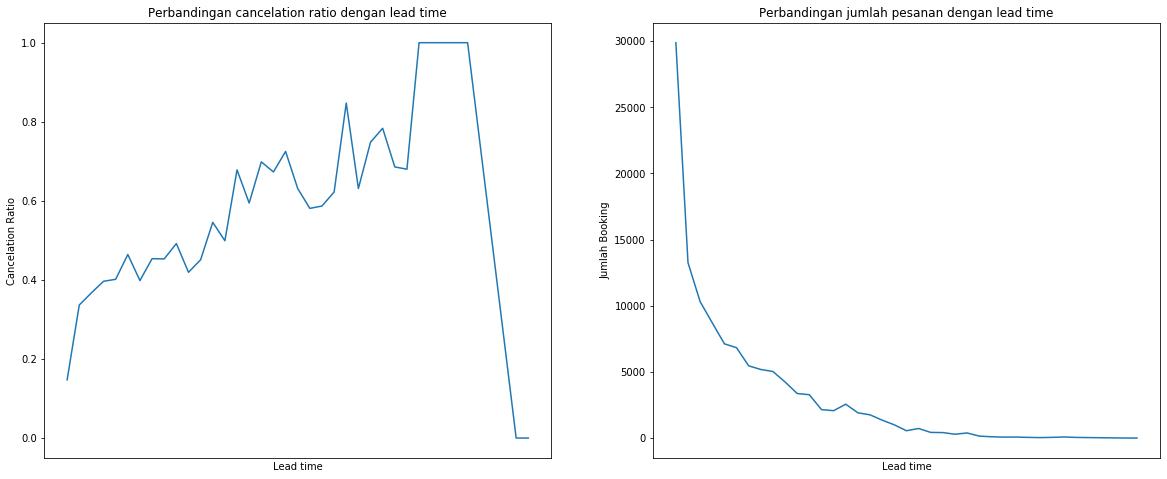

In [259]:
# plotting
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(data_lead_cancel_ratio.index, data_lead_cancel_ratio)
ax1.set_title("Perbandingan cancelation ratio dengan lead time")
ax1.set_xticks([])
ax1.set_xlabel("Lead time")
ax1.set_ylabel("Cancelation Ratio")

ax2.plot(data_lead_number_book.index, data_lead_number_book)
ax2.set_title("Perbandingan jumlah pesanan dengan lead time")
ax2.set_xticks([])
ax2.set_xlabel("Lead time")
ax2.set_ylabel("Jumlah Booking")

#### Analisis ADR

(array([1.1906e+04, 5.6779e+04, 3.4569e+04, 1.1029e+04, 3.5130e+03,
        8.6900e+02, 1.8900e+02, 3.6000e+01, 4.0000e+00, 2.0000e+00]),
 array([  0.,  51., 102., 153., 204., 255., 306., 357., 408., 459., 510.]),
 <a list of 10 Patch objects>)

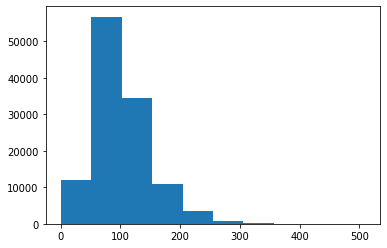

In [266]:
plt.hist(data['adr'])

In [268]:
data.groupby('is_canceled')['adr'].mean()

is_canceled
0    100.212044
1    104.917985
Name: adr, dtype: float64

In [271]:
# Perhitungan cancelation ratio per kelas ADR
data_adr = data[['is_canceled', 'adr']].copy()
data_adr['adr_class'] = pd.cut(data_adr['adr'], bins=(1 + 3.3*math.log(len(data_adr)))).cat.codes
data_adr_cancel_ratio = data_adr.groupby('adr_class')['is_canceled'].mean().dropna()

In [272]:
# perhitungan jumlah booking per kelas ADR
data_adr_number_book = data_adr.groupby('adr_class')['is_canceled'].count().dropna()

Text(0, 0.5, 'Jumlah Booking')

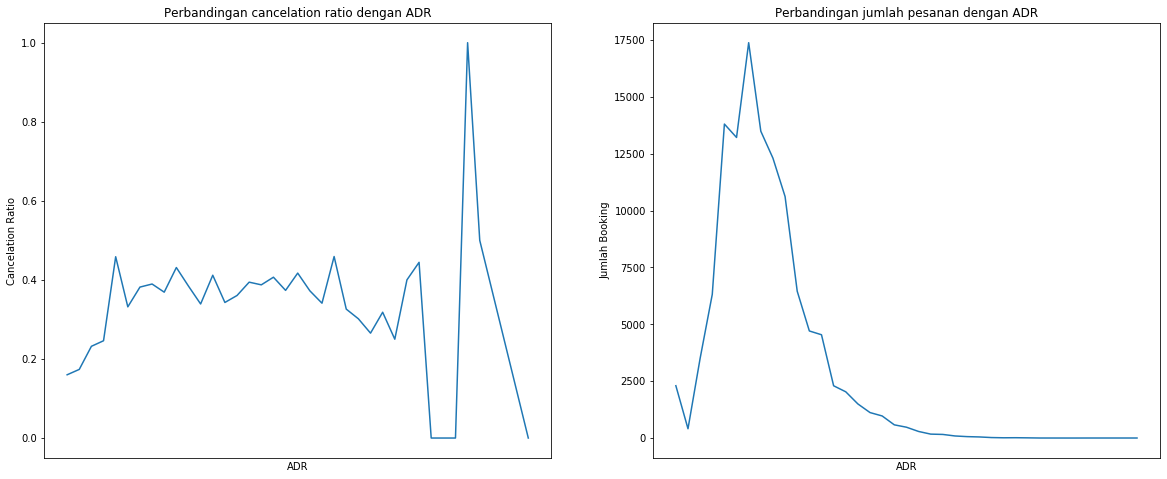

In [275]:
# plotting
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(data_adr_cancel_ratio.index, data_adr_cancel_ratio)
ax1.set_title("Perbandingan cancelation ratio dengan ADR")
ax1.set_xticks([])
ax1.set_xlabel("ADR")
ax1.set_ylabel("Cancelation Ratio")

ax2.plot(data_adr_number_book.index, data_adr_number_book)
ax2.set_title("Perbandingan jumlah pesanan dengan ADR")
ax2.set_xticks([])
ax2.set_xlabel("ADR")
ax2.set_ylabel("Jumlah Booking")

#### Analisis arrival date week number

Text(0, 0.5, 'Jumlah pesanan')

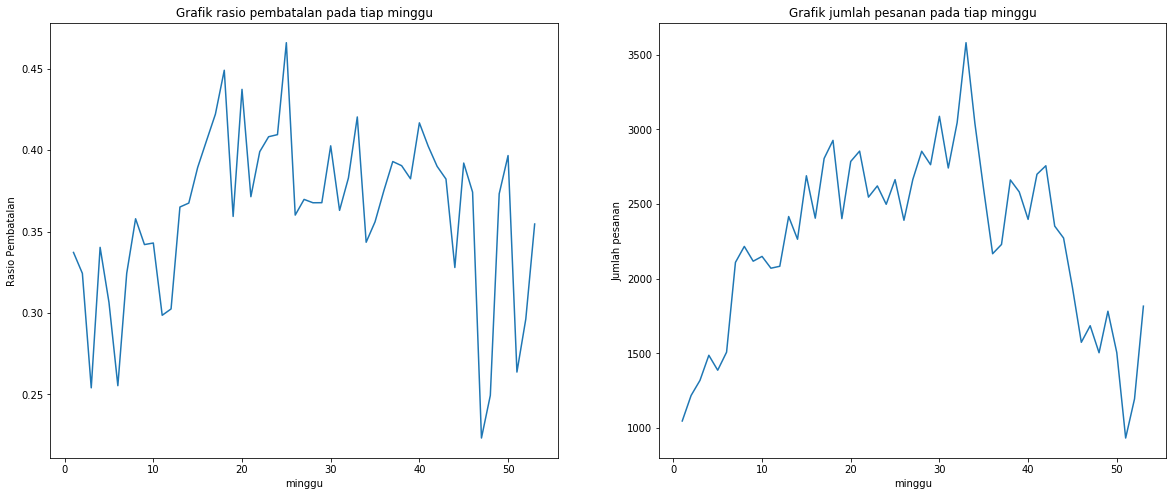

In [15]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(data.groupby('arrival_date_week_number')['is_canceled'].mean())
ax1.set_title('Grafik rasio pembatalan pada tiap minggu')
ax1.set_xlabel("minggu")
ax1.set_ylabel("Rasio Pembatalan")

ax2.plot(data['arrival_date_week_number'].value_counts().sort_index())
ax2.set_title('Grafik jumlah pesanan pada tiap minggu')
ax2.set_xlabel("minggu")
ax2.set_ylabel("Jumlah pesanan")

#### Analisis jenis deposit

In [20]:
data['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Text(0.5, 1.0, 'Proporsi jenis-jenis deposit')

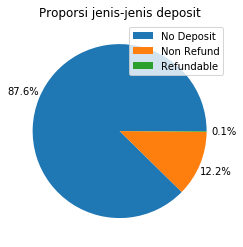

In [33]:
data.groupby('deposit_type')['is_canceled'].mean()

deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'Cancelation Ratio tiap Jenis Deposit')

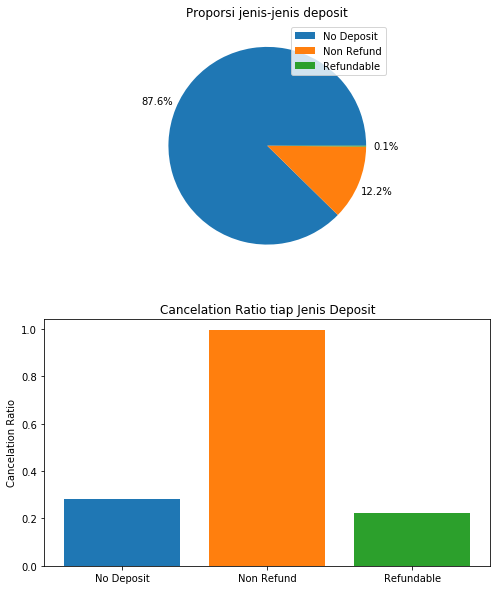

In [44]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pie(data['deposit_type'].value_counts(), autopct='%1.1f%%', pctdistance=1.2)
ax1.legend(data['deposit_type'].value_counts().index)
ax1.set_title("Proporsi jenis-jenis deposit")

ax2.bar(data.groupby('deposit_type')['is_canceled'].mean().index, data.groupby('deposit_type')['is_canceled'].mean(), color=['#1F77B4', '#FF7F0E', '#2CA02C'])
ax2.set_ylabel("Cancelation Ratio")
ax2.set_title("Cancelation Ratio tiap Jenis Deposit")

## Final Conclusion:
Diputuskan untuk menggunakan model random forest saja yang menghasilkan akurasi yang lebih baik & memakai resource komputasi yang lebih sedikit juga. Berikut merupakan spesifikasi parameter dari model random forest:
<ul><li>max_features = 10</li><li>n_estimators = 200 </li></ul>